In this notebook we begin writing code for finding the melancholia state.

In [2]:
cluster = False

In [10]:
import numpy as np
import sys

if cluster:
    sys.path.append('/rds/general/user/cfn18/home/Double-Well-SR/Deterministic-Model/')
    sys.path.append('/rds/general/user/cfn18/home/Instantons/L96-EBM-Instanton')
else: 
    sys.path.append('/Users/cfn18/Desktop/Double-Well-SR/Deterministic-Model/')
    sys.path.append('/Users/cfn18/Desktop/Double-Well-SR/')



from fancyWell import *
import matplotlib.pyplot as plt

import l96EBM as l96ebm 

In [259]:
# Writing Class for M State Algoirtimg

def bisect(x, y):
    return x + 0.5 * (y - x)

def check_cold(ic, integrator): # M State class needs such a function for initialisation
    """
    Checks whether a given ic ends up at the cold point.
    """
    
    integrator.set_state(ic)
    tau = 0.1 # How long we integrate between checks, will effect how efficient we are
    
    for i in range(1000): # How many checks we make
        integrator.integrate(tau)
        if integrator.state[0] < -0.5: #Threshold for being cold #ENSURE YOUR COLD IC MATCHES THE TRUE statement
            return True
        elif integrator.state[0] > 0.5: #Threshold for being hot
            return False  
    return None

class MStateAlgorithm:
    
    def __init__(self, integrator, check_cold, tau, ic):
        
        self.integrator = integrator
        self.check_cold = check_cold
        self.cold_point, self.hot_point = ic
        self.cold_ts=[self.cold_point]
        self.hot_ts=[self.hot_point]
        self.tau = tau
        self.time = 0

        
    def _midpoint_update(self):
        
        # Find midpoint
        midpoint = bisect(self.cold_point, self.hot_point)

        # Check if it the midpoint is cold or hot
        midpoint_cold = self.check_cold(midpoint, self.integrator)

        # Update cold or hot point depending on result
        if midpoint_cold:
            self.cold_point = midpoint
            heat_up(self.hot_point) # WRITE UP PROPERLY, NEED TO HAVE HEATING AND COOLING FUNCTIONS
        elif not midpoint_cold:
            self.hot_point = midpoint
            cool_down(self.cold_point)
        elif mid_point_cold is None: # check_cold didn't know
            print('IDK')
            self.cold_point = midpoint
            
                
    def _step(self):
        
        # Integate cold and hot points one step forward
        self.integrator.set_state(self.cold_point)
        self.integrator.integrate(tau)
        self.cold_point = self.integrator.state
    
        self.integrator.set_state(self.hot_point)
        self.integrator.integrate(tau)
        self.hot_point = integrator.state
        
        # Midpoint update
        self._midpoint_update()
#         self.cold_point, self.hot_point = ensure_cold_below_hot(self.cold_point, self.hot_point)
#         cold_temp = self.check_cold(self.cold_point, self.integrator)
#         cool_down(self.cold_point, cold_temp)
#         hot_temp = self.check_cold(self.hot_point, self.integrator)
#         heat_up(self.hot_point, hot_temp)
        
        self.time += self.tau
    
    def run(self, steps, timer=False):
        for i in tqdm(range(steps), disable=(not timer)):
            self._step()
            
            #UPDATE TO USE AN OBSEVERVER CLASS RATHER THAN THIS
            self.hot_ts.append(self.hot_point)
            self.cold_ts.append(self.cold_point)


            
# class MStateObserver:
    
#     def __init__(self, MStateAlgorithm):
#         self.alg = MStateAlgorithm
        
#     def 
        

In [257]:
def ensure_cold_below_hot(cold_point, hot_point):
    if cold_point[-1] <= hot_point[-1]:
        return cold_point, hot_point
    else:
        return hot_point, cold_point
    
def heat_up(x):
    x[-1] += 0.1

def cool_down(x):
    x[-1] -= 0.1

In [246]:
# x = np.array([1, 2])
x[-1] +=1
x

array([1, 5])

In [231]:
tau = 5.0
alpha = 0.0
cold_init = np.array([-1, 0.9])
hot_init = np.array([1, 0.2])

integrator = FancyWellIntegrator(alpha)
mstate = MStateAlgorithm(integrator, check_cold, tau, [cold_init, hot_init])

In [232]:
mstate.run(100)

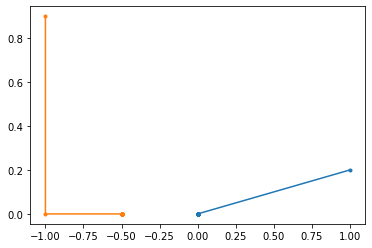

In [233]:
plt.plot(np.vstack(mstate.hot_ts)[:, 0], np.vstack(mstate.hot_ts)[:, 1],'.-')
plt.plot(np.vstack(mstate.cold_ts)[:, 0], np.vstack(mstate.cold_ts)[:, 1],'.-')

In [ ]:
integrator = l96ebm.Integrator()

In [ ]:
integrator.state[-1]

In [203]:
def l96_check_cold(ic, integrator): # M State class needs such a function for initialisation
    """
    Checks whether a given ic ends up at the cold point.
    """
    
    integrator.set_state(ic)
    tau = 0.1 # How long we integrate between checks, will effect how efficient we are
    
    for i in range(1000): # How many checks we make
        integrator.integrate(tau)
        if integrator.state[-1] < 260.0: #Threshold for being cold #ENSURE YOUR COLD IC MATCHES THE TRUE statemen
            return True
        elif integrator.state[-1] > 290.0: #Threshold for being hot
            return False
    # If we can't decide
    
    
    return None

In [191]:
1000 * 0.1

100.0

  0%|          | 0/50 [00:00<?, ?it/s]

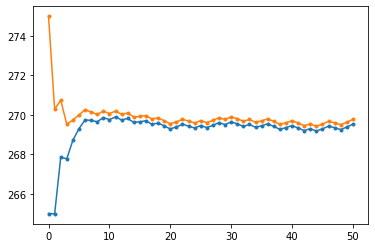

In [262]:
tau = 0.1

integrator = l96ebm.Integrator()
cold_init = integrator.state
cold_init[-1] = 265

hot_init = integrator.state
hot_init[-1] = 275

mstate = MStateAlgorithm(integrator, l96_check_cold, tau, [cold_init, hot_init])
mstate.run(50, timer=True)
plt.plot(np.vstack(mstate.cold_ts)[:, -1],'.-')
plt.plot(np.vstack(mstate.hot_ts)[:, -1],'.-')

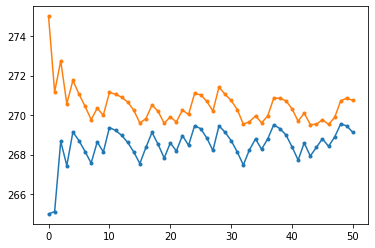

In [261]:
plt.plot(np.vstack(mstate.cold_ts)[:, -1],'.-')
plt.plot(np.vstack(mstate.hot_ts)[:, -1],'.-')

  0%|          | 0/2000 [00:00<?, ?it/s]

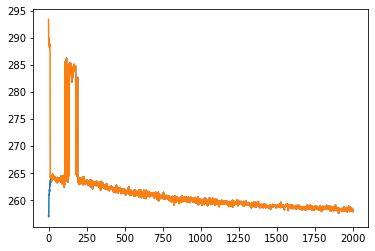

In [173]:
a_ts = []
b_ts = []
for k in tqdm(range(2000)):  
    integrator.set_state(np.vstack(mstate.cold_ts)[k])
    integrator.integrate(10)
    a = integrator.state[-1]
    
    integrator.set_state(np.vstack(mstate.hot_ts)[k])
    integrator.integrate(10)
    b = integrator.state[-1]
#     print(f'Step {k}:\n{a:.1f} & {b:.1f}')
    a_ts.append(a)
    b_ts.append(b)
plt.plot(a_ts)
plt.plot(b_ts)

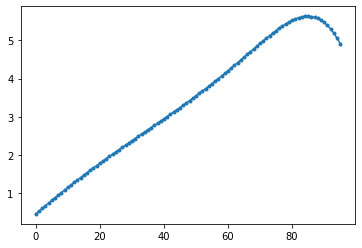

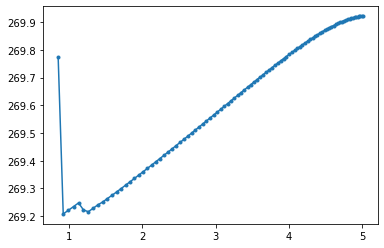

In [113]:
plt.plot(np.vstack(mstate.hot_ts)[5:, -3],'.-')
plt.show()
plt.plot(np.mean(np.vstack(mstate.cold_ts)[5:, :-2], axis=1), np.vstack(mstate.hot_ts)[5:, -1],'.-')

In [116]:
mstate.integrator.time

1746.0999999995065

In [ ]:
integrator.set_state(cold_init)

In [51]:
integrator = l96ebm.Integrator()

In [55]:
integrator.integrate(10)

In [98]:
runner = l96ebm.Integrator()
runner.set_state(cold_init)
looker = l96ebm.TrajectoryObserver(runner)
l96ebm.make_observations(runner, looker, 1000, 1, noprog=False)

100%|██████████| 1000/1000 [00:22<00:00, 44.68it/s]


In [114]:
runner.time

1000

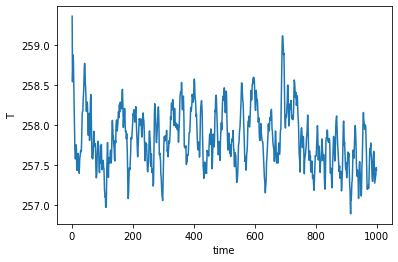

In [99]:
looker.observations.T.plot()

In [7]:
example_state = np.ones(40)
example_state[-1] = 280

In [59]:
# TO DO: FINISH THIS MSTATE OBSERVER CLASS SO THAT YOU CAN PLOT THE MSTATE


class L96_MState_Observer():
    """Observes the Mstate algorithm for the L96 EBM model. Dumps to netcdf."""

    def __init__(self, mstate):
        """param, integrator: integrator being observed."""
        
        self.dump_count = 0

        # Needed knowledge of the integrator
        self._parameters = mstate.integrator.parameter_dict
        self._K = mstate.integrator.K

        # Trajectory Observation logs
        self.time_obs = [] # Times we've made observations
        self.hot_x_obs = []
        self.hot_T_obs = []
        self.cold_x_obs = []
        self.cold_T_obs = []

    def look(self, mstate):
        """Observes trajectory of L96 trajectory"""

        # Note the time
        self.time_obs.append(mstate.time)

        # Making Observations
        
        self.hot_x_obs.append(mstate.hot_point[:-1].copy())
        self.hot_T_obs.append(mstate.hot_point[-1].copy())
        self.cold_x_obs.append(mstate.cold_point[:-1].copy())
        self.cold_T_obs.append(mstate.cold_point[-1].copy())
        return

    @property
    def cold_observations(self):
        if (len(self.cold_x_obs) == 0):
            print('I have no observations! :(')
            return

        dic = {}
        _time = self.time_obs
        dic['X'] = xr.DataArray(self.cold_x_obs, dims=['time', 'space'], name='X',
                                coords = {'time': _time,'space': np.arange(1, 1 + self._K)})
        dic['T'] = xr.DataArray(self.cold_T_obs, dims=['time'], name='T',
                                coords = {'time': _time})
        return xr.Dataset(dic, attrs= self._parameters)
    
    @property
    def hot_observations(self):
        if (len(self.hot_x_obs) == 0):
            print('I have no observations! :(')
            return

        dic = {}
        _time = self.time_obs
        dic['X'] = xr.DataArray(self.hot_x_obs, dims=['time', 'space'], name='X',
                                coords = {'time': _time,'space': np.arange(1, 1 + self._K)})
        dic['T'] = xr.DataArray(self.hot_T_obs, dims=['time'], name='T',
                                coords = {'time': _time})
        return xr.Dataset(dic, attrs= self._parameters)

    def wipe(self):
        """Erases observations"""
        self.time_obs = []
        self.hot_x_obs = []
        self.hot_T_obs = []
        self.cold_x_obs = []
        self.cold_T_obs = []

    def dump(self, cupboard, names = None):
        """ Saves observations to netcdf and wipes.
        cupboard: Directory where to write netcdf.
        name: file name"""

        if (len(self.x_obs) == 0):
            print('I have no observations! :(')
            return

        for i, ds in enumerate([cold_observations, hot_obsrvations]):
            if names is None:
                names =['Cold-Points', 'Hot-Points'] 
            name = names[i]
            save_cupboard = cupboard + f'/{name}/' 
            if not os.path.exists(save_cupboard):
                os.makedirs(save_cupboard)
            save_name = save_cupboard + f'{self.dump_count + 1}.nc'
            ds.to_netcdf(save)
            print(f'Observations written to {save}. Erasing personal log.\n')
            self.wipe()
            self.dump_count +=1

In [50]:
import os
os.path.exists('a')

False

In [265]:
looker = L96_MState_Observer(mstate)
integrator = l96ebm.Integrator()
cold_init = integrator.state
cold_init[-1] = 255

hot_init = integrator.state
hot_init[-1] = 291

tau = 0.2
mstate = MStateAlgorithm(integrator, l96_check_cold, tau, [cold_init, hot_init])

def make_observations(runner, looker, obs_num, obs_freq, noprog=True):
    """Makes observations given runner and looker.
    runner, integrator object.
    looker, observer object.
    obs_num, how many observations you want.
    obs_freq, adimensional time between observations"""
    for step in tqdm(np.repeat(obs_freq, obs_num), disable=noprog):
        mstate.run(obs_freq)
        looker.look(runner)
        
make_observations(mstate, looker, 1000, 1, False)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:03<00:00, 320.54it/s]


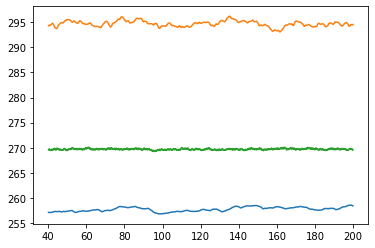

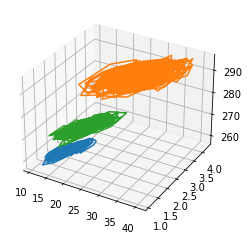

In [266]:
m_state = looker.hot_observations

runner = l96ebm.Integrator()
runner.set_state(cold_init)
looker = l96ebm.TrajectoryObserver(runner)
l96ebm.make_observations(runner, looker, 1000, tau, noprog=False)

cold_state = looker.observations

runner = l96ebm.Integrator()
runner.set_state(hot_init)
looker = l96ebm.TrajectoryObserver(runner)
l96ebm.make_observations(runner, looker, 1000, tau, noprog=False)

hot_state = looker.observations

for state in [cold_state, hot_state, m_state]:
    ds = state.isel(time=slice(200, -1))
    plt.plot(ds.time, ds.T)
    
plt.show()

ax = plt.axes(projection='3d') 


for state in [cold_state, hot_state, m_state]:
    ds = state.isel(time=slice(200, -1))
    ax.plot(energy(ds), momentum(ds), ds.T)

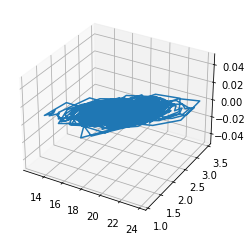

In [271]:
# ax = plt.axes(projection='3d') 


for state in [m_state]:
    ds = state.isel(time=slice(200, -1))
    plt.plot(energy(ds), momentum(ds))

In [ ]:
ax = plt.axes(projection='3d') 

def energy(ds):
    return (ds.X**2).mean(dim='space')
def momentum(ds):
    return ds.X.mean(dim='space')


for state in [cold_state, hot_state, m_state]:
    ds = state.isel(time=slice(200, -1))
    ax.plot(energy(ds), momentum(ds), ds.T)

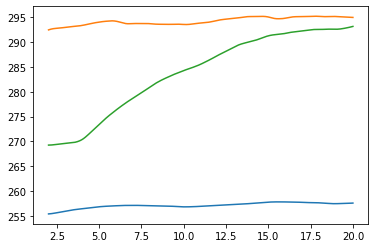

In [190]:
for state in [cold_state, hot_state, m_state]:
    ds = state.isel(time=slice(200, -1))
    plt.plot(ds.time, ds.T)



In [165]:
init = m_state.isel(time=90)

runner = l96ebm.Integrator()
runner.set_state(np.append(init.X.values, init.T.values))
looker = l96ebm.TrajectoryObserver(runner)


100%|██████████| 2000/2000 [00:02<00:00, 900.12it/s]


100%|██████████| 5000/5000 [00:05<00:00, 972.01it/s] 


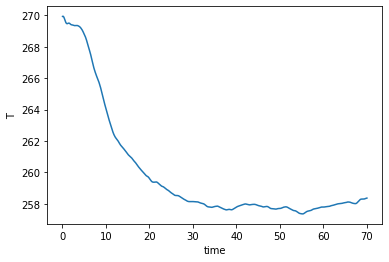

In [167]:
l96ebm.make_observations(runner, looker, 5000, tau, noprog=False)
looker.observations.T.plot()

In [184]:
runner = l96ebm.Integrator()
test_init = hot_init
test_init[-1] = 271
runner.set_state(test_init)
runner.integrate(20.)
runner.state[-1]

294.89267695935126

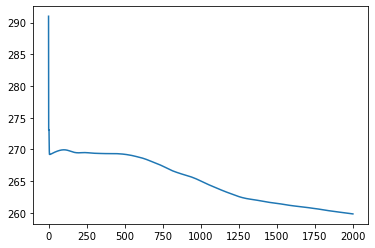

In [172]:
for k in range(2000):
    ic = np.vstack(mstate.hot_ts)[k, -1]